In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Get the data from the .csv file
df = pd.read_csv('kmeans_data.csv',
    usecols=['Feature 1', 'Feature 2', 'Class'])


In [3]:
df.head()

Feature 1  Feature 2  Class
0     -0.646      0.763  Green
1     -0.610      0.617  Green
2     -0.596      0.915  Green
3     -0.565      0.927  Green
4     -0.542      0.631  Green

In [4]:
# Change categorical data to number 0-2
df["Class"] = pd.Categorical(df["Class"])
df["Class"] = df["Class"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:2]
category = df.values[:, 2]

[[-0.25  0.2 ]
 [ 0.   -0.1 ]
 [ 0.25  0.35]]


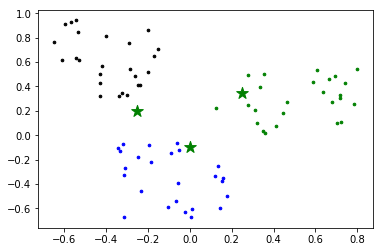

In [33]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean
centers = np.array([[-0.25, 0.2], [0, -0.1], [0.25, 0.35]])
print(centers)

# Plot the data and the centers generated as random
colors=['green', 'blue', 'black']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)


In [36]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    print(error)
centers_new 

0.5479291889031984
0.0


array([[-0.38296296,  0.55803704],
       [-0.07278261, -0.36734783],
       [ 0.5232    ,  0.29572   ]])

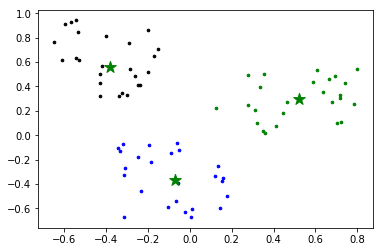

In [35]:
# Plot the data and the centers generated as random
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)